In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#matplotlib 패키지 한글 깨짐 처리 시작
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [3]:
nong = pd.read_csv("C:/Users/Admin/Desktop/KB_2기_work/파이널프로젝트1조/데이터셋/nongdf.csv")
nong
df = nong.drop(['Unnamed: 0'],axis=1)
df['day'] = df['day'].replace({0: '월요일',1: '화요일',2: '수요일',3: '목요일',4: '금요일',5: '토요일',6: '일요일',})
df

,date,배추_거래량(kg),배추_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),상추_거래량(kg),상추_가격(원/kg),양상추_거래량(kg),양상추_가격(원/kg),무_거래량(kg),무_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),day
0,2017-10-14,4859.0,694.0,4632.00,1090.0,900.0,5199.0,3203.00,3861.0,145.0,1103.0,3278.0,1558.0,835.000,800.0,9729.780,409.0,1663.00,1540.0,토요일
1,2017-10-15,5733.4,745.5,5669.25,1091.0,641.2,5365.0,3384.05,3818.5,167.5,1140.0,3434.3,1651.5,1061.150,884.0,14924.030,427.0,1761.55,1528.5,일요일
2,2017-10-16,6607.8,797.0,6706.50,1092.0,382.4,5531.0,3565.10,3776.0,190.0,1177.0,3590.6,1745.0,1287.300,968.0,20118.280,445.0,1860.10,1517.0,월요일
3,2017-10-17,6240.6,749.0,4946.00,1086.0,1365.8,4958.0,2581.00,4093.0,163.0,1131.0,2882.2,2235.0,1121.900,795.0,27954.280,403.0,1610.80,1664.0,화요일
4,2017-10-18,5893.6,629.0,5214.00,1086.0,1343.4,5091.0,2650.90,4250.0,151.0,1042.0,3078.2,2158.0,963.800,926.0,38137.280,417.0,1838.30,1711.0,수요일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2022-10-09,5934.5,1623.0,4347.00,1371.5,1574.5,6748.0,2608.40,6088.5,1342.5,1939.5,3102.0,2594.0,1150.745,1654.5,4830.085,1475.5,1242.50,3369.5,일요일
1822,2022-10-10,6595.0,1697.0,4374.00,1394.0,1580.0,6863.0,2627.80,5913.0,1335.0,2016.0,3112.0,2718.0,1161.250,1578.0,5038.260,1367.0,1325.50,3175.0,월요일
1823,2022-10-11,5498.0,1206.0,4397.00,1464.0,1777.0,7151.0,1877.00,6357.0,1316.4,1801.0,2650.0,2605.0,1212.490,1508.0,24264.510,1257.0,1351.50,2857.0,화요일
1824,2022-10-12,6324.0,1240.0,5438.00,1396.0,1164.0,6931.0,2127.00,6997.0,1144.8,1913.0,3014.0,2527.0,981.250,1334.0,23683.060,1372.0,1437.00,2902.0,수요일


In [4]:
feature = df.columns[1:20]
df = df.reset_index(drop=True)

In [5]:
df.columns

Index(['date', '배추_거래량(kg)', '배추_가격(원/kg)', '양파_거래량(kg)', '양파_가격(원/kg)',
       '마늘_거래량(kg)', '마늘_가격(원/kg)', '깻잎_거래량(kg)', '깻잎_가격(원/kg)', '대파_거래량(kg)',
       '대파_가격(원/kg)', '상추_거래량(kg)', '상추_가격(원/kg)', '양상추_거래량(kg)',
       '양상추_가격(원/kg)', '무_거래량(kg)', '무_가격(원/kg)', '시금치_거래량(kg)',
       '시금치_가격(원/kg)', 'day'],
      dtype='object')

In [6]:
heatmap_data = df[['배추_거래량(kg)', '배추_가격(원/kg)', '양파_거래량(kg)', '양파_가격(원/kg)',
       '마늘_거래량(kg)', '마늘_가격(원/kg)', '깻잎_거래량(kg)', '깻잎_가격(원/kg)', '대파_거래량(kg)',
       '대파_가격(원/kg)', '상추_거래량(kg)', '상추_가격(원/kg)', '양상추_거래량(kg)',
       '양상추_가격(원/kg)', '무_거래량(kg)', '무_가격(원/kg)', '시금치_거래량(kg)',
       '시금치_가격(원/kg)']]

C:\Users\Admin\AppData\Local\Temp\ipykernel_25564\2206427278.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(heatmap_data.corr(),dtype=np.bool)


<AxesSubplot:title={'center':'Person Correlation of Features'}>

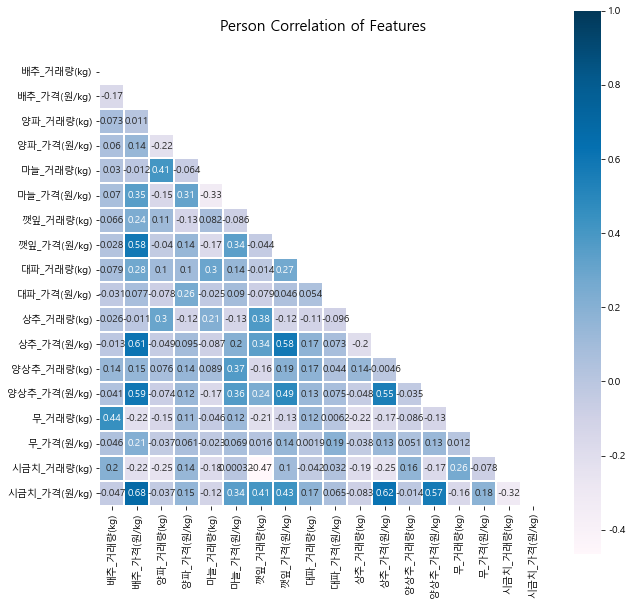

In [9]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 10))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
mask=np.zeros_like(heatmap_data.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10},mask=mask)

<AxesSubplot:>

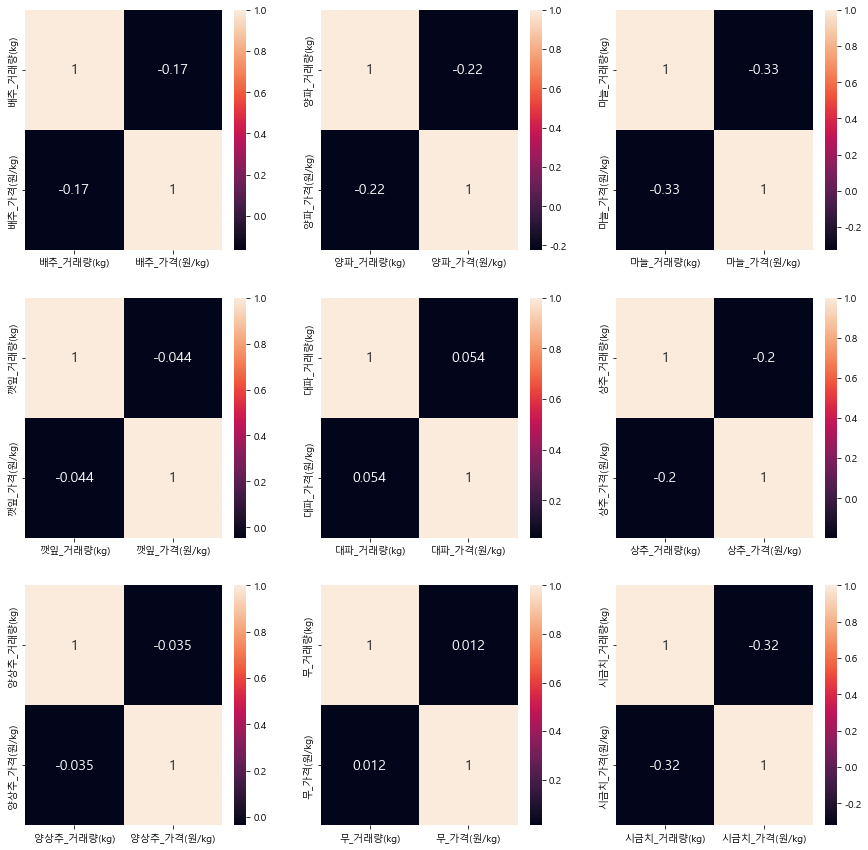

In [10]:
plt.figure(figsize=(15, 15))
plt.subplot(331)
sns.heatmap(df[['배추_거래량(kg)', '배추_가격(원/kg)']].corr(),annot = True, annot_kws = {"size" : 14})

plt.subplot(332)
sns.heatmap(df[['양파_거래량(kg)', '양파_가격(원/kg)']].corr(),annot = True, annot_kws = {"size" : 14})

plt.subplot(333)
sns.heatmap(df[['마늘_거래량(kg)', '마늘_가격(원/kg)']].corr(),annot = True, annot_kws = {"size" : 14})

plt.subplot(334)
sns.heatmap(df[['깻잎_거래량(kg)', '깻잎_가격(원/kg)']].corr(),annot = True, annot_kws = {"size" : 14})

plt.subplot(335)
sns.heatmap(df[['대파_거래량(kg)', '대파_가격(원/kg)']].corr(),annot = True, annot_kws = {"size" : 14})

plt.subplot(336)
sns.heatmap(df[['상추_거래량(kg)', '상추_가격(원/kg)']].corr(),annot = True, annot_kws = {"size" : 14})

plt.subplot(337)
sns.heatmap(df[['양상추_거래량(kg)', '양상추_가격(원/kg)']].corr(),annot = True, annot_kws = {"size" : 14})

plt.subplot(338)
sns.heatmap(df[['무_거래량(kg)', '무_가격(원/kg)']].corr(),annot = True, annot_kws = {"size" : 14})

plt.subplot(339)
sns.heatmap(df[['시금치_거래량(kg)', '시금치_가격(원/kg)']].corr(),annot = True, annot_kws = {"size" : 14})


## 각 농산물의 거래량, 가격(최근5년~2022/10/13)

<AxesSubplot:>

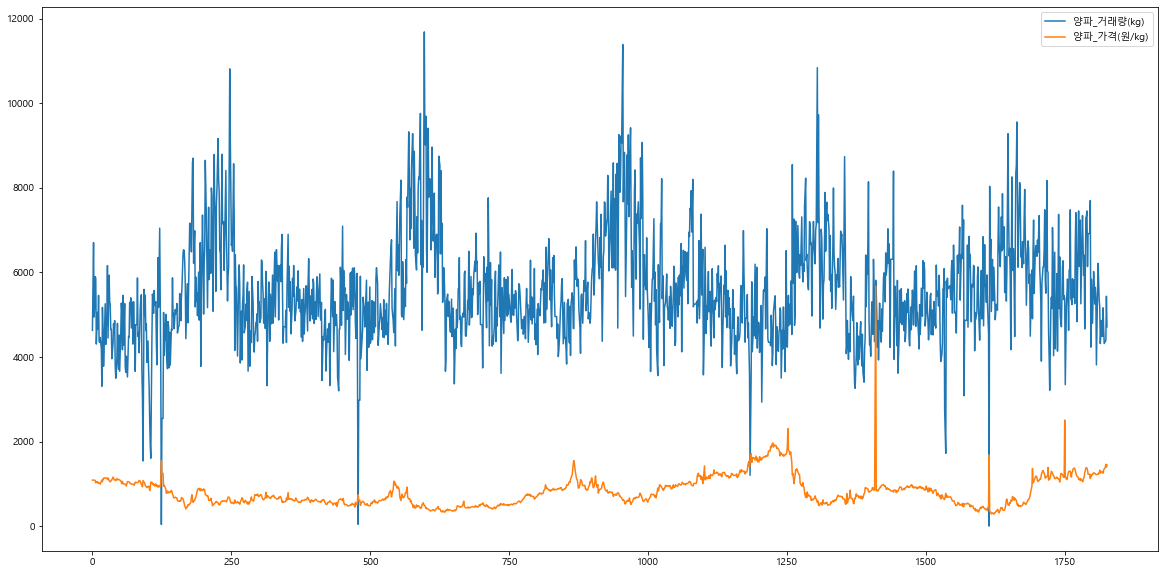

In [7]:
df[feature[2:4]].plot(figsize=(20,10))   # 양파 거래량, 가격

### 가격분포 확인

<AxesSubplot:>

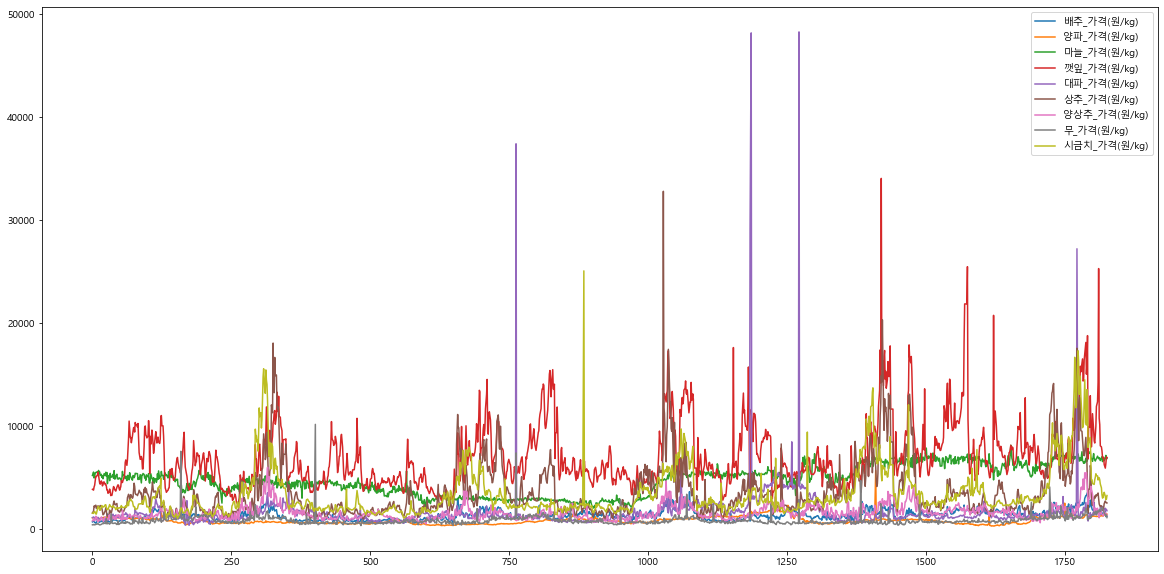

In [4]:
feature_price = []
for i in range(1,10):
    feature_price.append(feature[2*i-1])

    
df[feature_price[:]].plot(figsize=(20,10))

<AxesSubplot:>

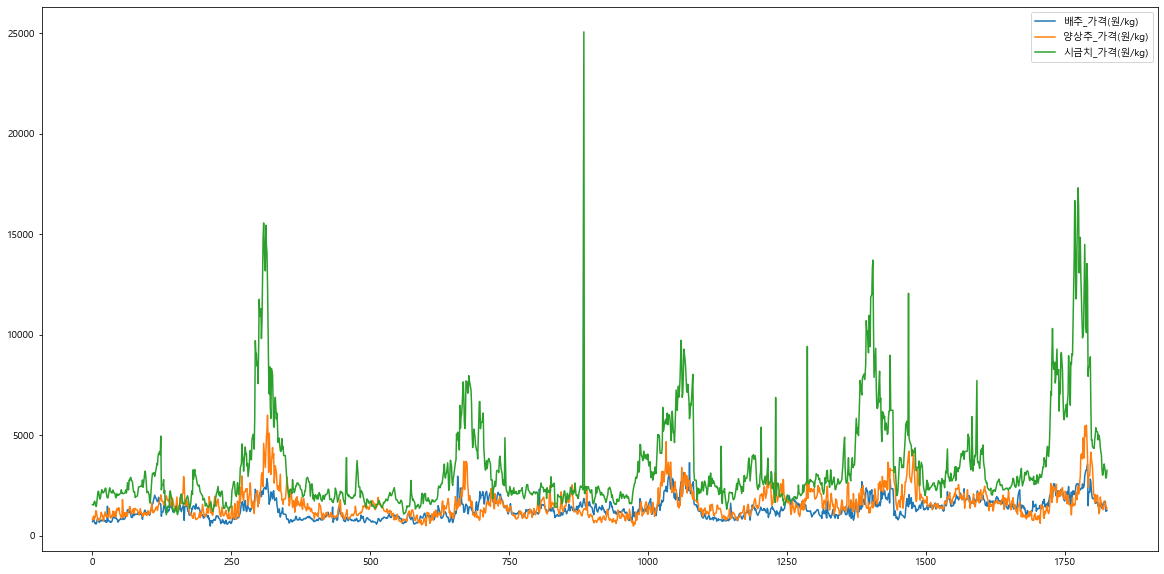

In [28]:
df[['배추_가격(원/kg)','양상추_가격(원/kg)','시금치_가격(원/kg)']].plot(figsize=(20,10))

<AxesSubplot:>

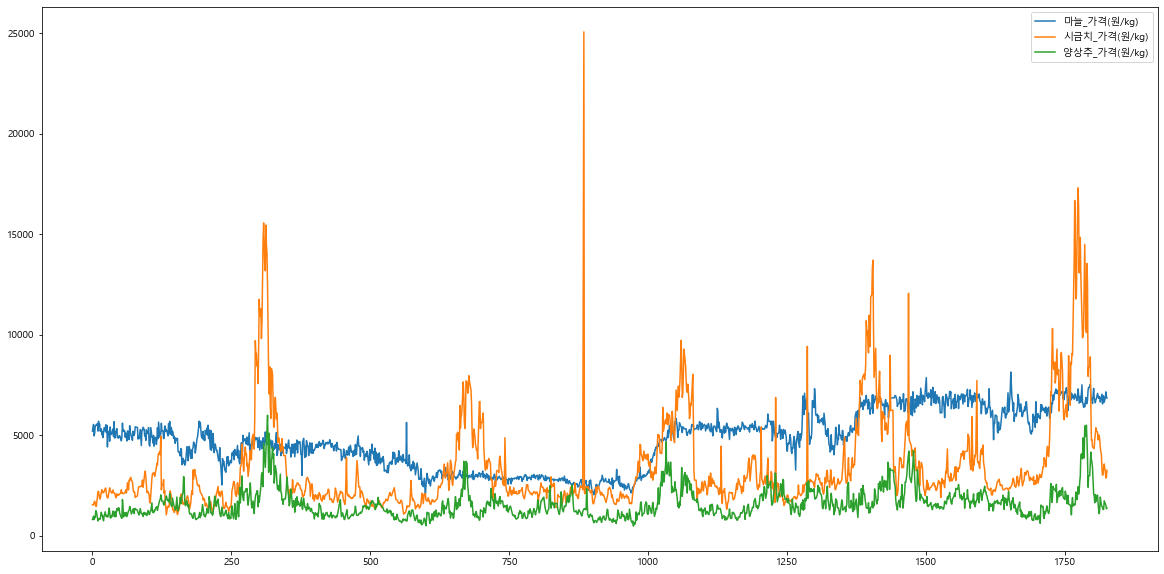

In [29]:
df[['마늘_가격(원/kg)','시금치_가격(원/kg)','양상추_가격(원/kg)']].plot(figsize=(20,10))

<AxesSubplot:>

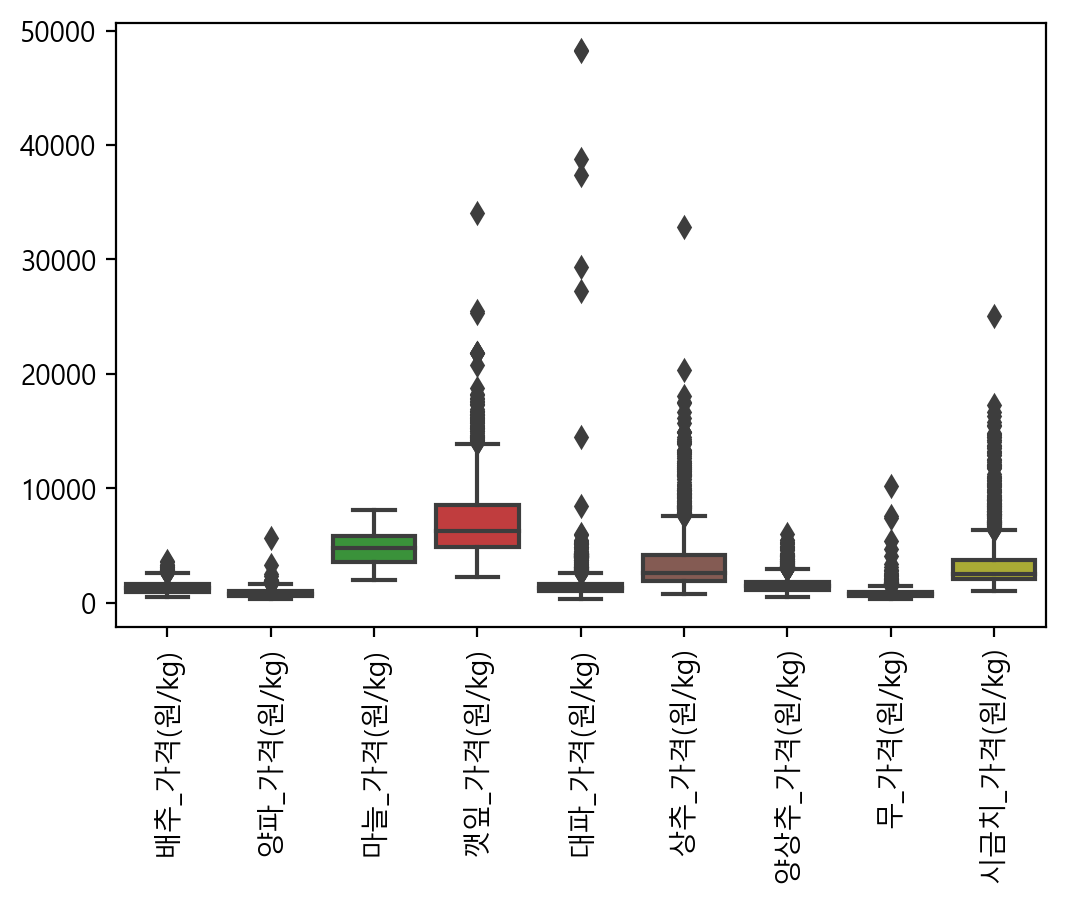

In [24]:
fig = plt.figure(dpi=200)
plt.xticks(rotation=90)
sns.boxplot(data=df[feature_price[:]])

### 해석
- 데이터에는 특이값이 종종 포함되어 있는 것을 볼 수 있음 (이상치라기보다는 우리가 예측해야 하는 값)
- 그럼에도 실제가격과 다른 데이터가 존재(수집해온 데이터와 평균처리 과정에서 생긴 오류)

- 농산물들은 각각의 상관관계가 있다고 판단하기 어려움
- 그러나, 전체적인 추세가 비슷함
- 그 중, 마늘의 경우 독자적인 추세가 있었음(1년 내내 재배가 가능하고, 품종이 매우 다양하기 때문일 것으로 판단됨)

## 통계 오류로 인한 이상치 -> 확인 후 농넷에서 실제거래가격으로 변경

In [34]:
df[['대파_거래량(kg)','대파_가격(원/kg)']].agg(['max','min'])

,대파_거래량(kg),대파_가격(원/kg)
max,1958.4,48263.0
min,32.0,364.0


In [35]:
df.loc[df['대파_가격(원/kg)']==48263.0]

,date,배추_거래량(kg),배추_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),상추_거래량(kg),상추_가격(원/kg),양상추_거래량(kg),양상추_가격(원/kg),무_거래량(kg),무_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),day
1271,2021-04-07,3606.0,1479.0,5979.0,1226.0,2136.26,4575.0,1944.0,4753.0,1086.0,48263.0,2953.0,2011.0,1346.0,1077.0,3454.53,2851.0,1899.52,2099.0,수요일


4월7일 대파 가격은 최고 4300원, 평균 3460원

## 변경 후 데이터셋 확인

In [26]:
df1 = pd.read_csv('C:/Users/Admin/Desktop/KB_2기_work/파이널프로젝트1조/데이터셋/ns.csv')

<AxesSubplot:>

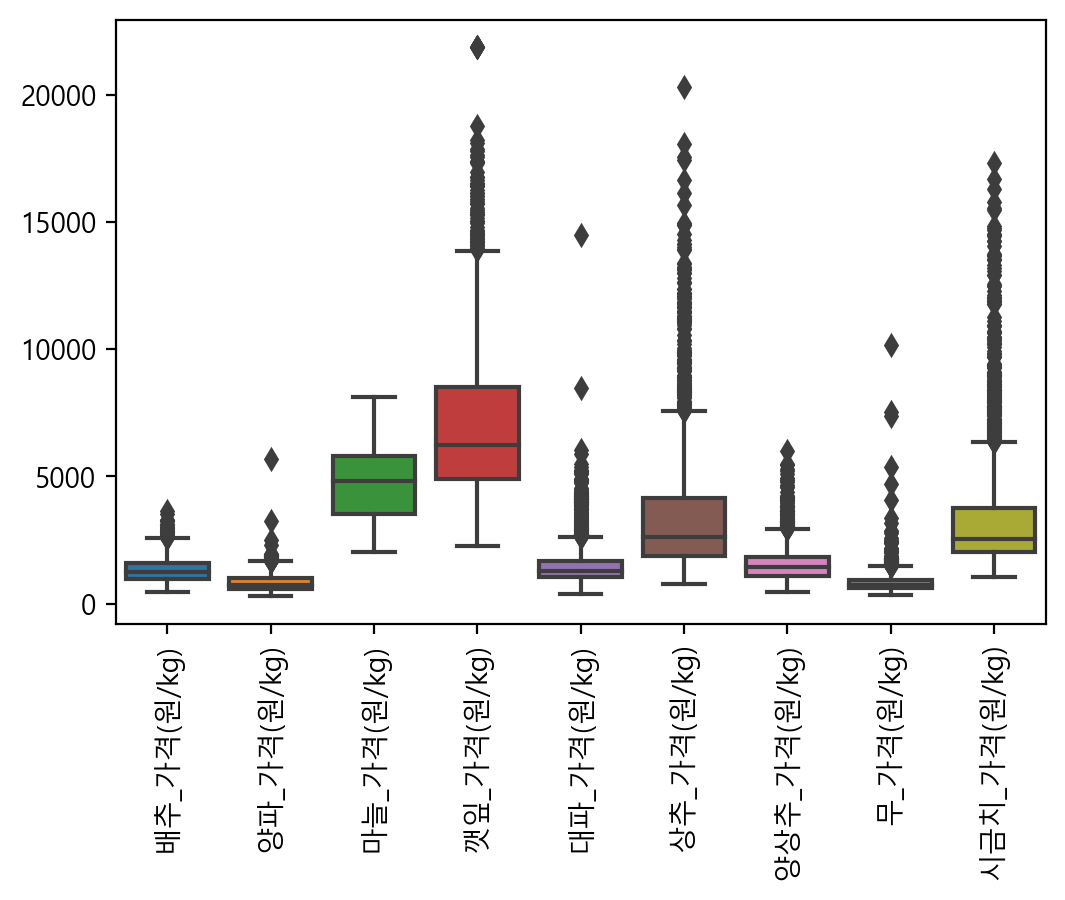

In [25]:
feature1 = df1.columns[1:20]
df1 = df1.reset_index(drop=True)

feature_price1 = []
for i in range(1,10):
    feature_price1.append(feature1[2*i-1])

fig = plt.figure(dpi=200)
plt.xticks(rotation=90)
sns.boxplot(data=df1[feature_price[:]])

### 기타사항

- 대파가격의 폭등

 2021년 초 대파가격 폭등으로 '파테크','반려대파'라는 말이 나올 정도 였으며, 집에서 대파를 키우는 사람들이 생겼었다. 3월의 대파 소매 가격이 kg당 7,399원, 도매 가격은 kg당 5,792원에 거래된 것을 파악할 수 있다. 이는 2020년 12월의 가격과 비교했을 때, 약 2배 정도 상승한 것이다. 대파가격이 상승하게 된 주요 원인으로 코로나 바이러스와 인력부족 등 여러 요인이 종합적으로 포함될 수 있으나, 가장 큰 원인은 기후변화였다.

   2020년 여름, 국내에는 역대급 장마가 지속되었고,  장마철이 길어지면서, 모심기가 많이 늦어지게 되었고, 따라서 겨울철 대파가 덜 자란 상태가 되었다. 겨울철 대파의 주요 생산지는 전라남도 신안, 진도 지역으로, 눈이 거의 오지 않는 남부지방이다. 하지만, 작년 겨울에는 기후변화로 인한 이상기후로, 언급된 지역에 한파와 폭설이 나타났다고 한다. 이는 모심기가 늦어 덜 자란 상태였던 대파마저, 한파와 폭설로 인해 모두 죽게 되어 생산량이 크게 감소했다는 것을 의미한다. 결국, 생산량이 사람들의 수요량을 감당하지 못해 가격이 폭등하게 되었다.


- 랜덤포레스트와 LSTM
 
 농산물의 가격은 거래량과 어느정도수준 비례할 것으로 예상했지만, 거래량과 가격은 큰 상관관계가 없는 것으로 나타났다. 그 이유는 이상기후의 영향을 크게 받고, 그에 따른 재배상황 변동이 수급량 뿐만 아니라 품종의 상태에 영향을 크게 미치기 때문인것으로 보인다.
결과적으로 미래 가격을 예측하는데, 거래량은 큰 영향을 주지못한다. 다른 웹사이트들이 수급상황, 품종등급(특상~하)을 함께 제시하는 이유라고 할 수 있다.

 일년 내내 재배하는 작물과 주기적으로 재배하는 작물에 관해서도 차이가 있으나, 농산물은 국가적으로도 관리가 되고 있다고 판단 된다. 

 따라서 가격의 시계열 분석을 통한 예측이 필요하였고, 랜덤포레스트와 LSTM 모델 중 LSTM모델이 미래가격에 대한 예측을 비교적 잘 한다고 할 수 있다.